In [1]:
!./download-images.sh
# %pip install -r requirements.txt

--2023-10-19 22:50:02--  https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png
Resolving networkcameratech.com (networkcameratech.com)... 54.157.250.197
Connecting to networkcameratech.com (networkcameratech.com)|54.157.250.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1561813 (1.5M) [image/png]
Saving to: ‘images/original/1.jpg’

images/original/1.j 100%[===================>]   1.49M   291KB/s    in 5.2s    

2023-10-19 22:50:08 (292 KB/s) - ‘images/original/1.jpg’ saved [1561813/1561813]

--2023-10-19 22:50:08--  https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_52_01.png
Resolving networkcameratech.com (networkcameratech.com)... 54.157.250.197
Connecting to networkcameratech.com (networkcameratech.com)|54.157.250.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1822995 (1.7M) [image/png]
Saving to: ‘images/original/2.jpg’


In [2]:
from src.utils import *
from src.services import *

# Calculate Contrast

In [3]:

image_num = 5
image =  open_image_as_grayscale(image_num)
matrix = convert_pillow_image_to_2d_matrix(image)
print(f'contrast of Image num {image_num} is {calculate_contrast(matrix)}')

2023-10-19 22:50:20.866 | INFO     | src.utils:open_image_as_grayscale:12 - Opening image from path: 5
2023-10-19 22:50:20.890 | INFO     | src.utils:convert_pillow_image_to_2d_matrix:17 - Converting pillow image to 2d matrix
2023-10-19 22:50:21.624 | INFO     | src.services:calculate_co_occurrence_matrix:16 - Calculating co-occurrence matrix
2023-10-19 22:50:22.159 | INFO     | src.services:calculate_contrast:42 - Calculating contrast


contrast of Image num 5 is 4143360


# Calculate Histograms

2023-10-19 22:50:22.298 | INFO     | src.services:calculate_image_histogram:55 - Calculating histogram
2023-10-19 22:50:22.444 | INFO     | src.utils:plot_histogram:51 - Plotting histogram for image: 5


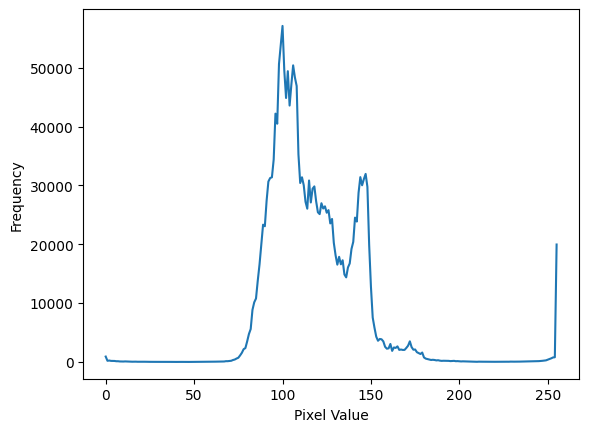

<Figure size 640x480 with 0 Axes>

In [4]:
histogram = calculate_image_histogram(matrix)
plot_histogram(histogram, image_num)

2023-10-19 22:50:22.623 | INFO     | src.services:calculate_cumulative_histogram:70 - Calculating cumulative histogram
2023-10-19 22:50:22.628 | INFO     | src.utils:plot_histogram:51 - Plotting histogram for image: 5 cumulative


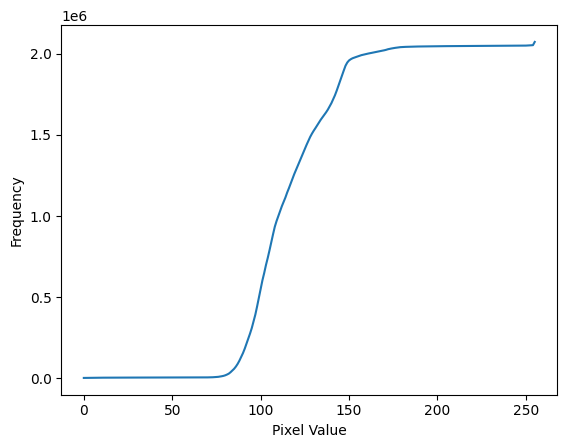

<Figure size 640x480 with 0 Axes>

In [5]:
cumulative = calculate_cumulative_histogram(histogram)
plot_histogram(cumulative, f'{image_num} cumulative')


In [6]:
c, d = get_color_at_percentage(cumulative_histogram=cumulative, percentage=5)
print(f'c: {c}, d: {d}')

2023-10-19 22:50:22.750 | INFO     | src.services:get_color_at_percentage:80 - Getting color at percentage: 5


c: 88, d: 151


# Image Enhancements

## Contrast Stretching

2023-10-19 22:50:22.764 | INFO     | src.utils:open_image_as_grayscale:12 - Opening image from path: 5
2023-10-19 22:50:22.774 | INFO     | src.utils:show_image:63 - Showing image


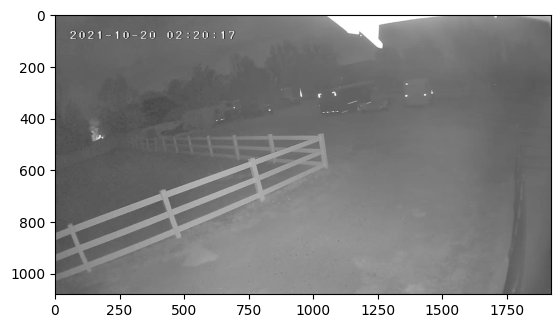

In [7]:
old_image =  open_image_as_grayscale(image_num)
show_image(old_image)

2023-10-19 22:50:23.077 | INFO     | src.services:contrast_stretch:97 - Contrast stretching
2023-10-19 22:50:24.006 | INFO     | src.utils:show_image:63 - Showing image


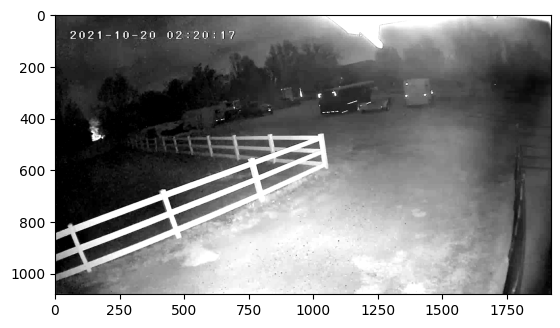

In [8]:
new_image = contrast_stretch(matrix, a=0, b=257, c=c, d=d)
show_image(new_image)

2023-10-19 22:50:24.488 | INFO     | src.services:calculate_image_histogram:55 - Calculating histogram
2023-10-19 22:50:24.639 | INFO     | src.services:calculate_cumulative_histogram:70 - Calculating cumulative histogram
2023-10-19 22:50:24.641 | INFO     | src.services:calculate_image_histogram:55 - Calculating histogram
2023-10-19 22:50:24.777 | INFO     | src.services:calculate_cumulative_histogram:70 - Calculating cumulative histogram


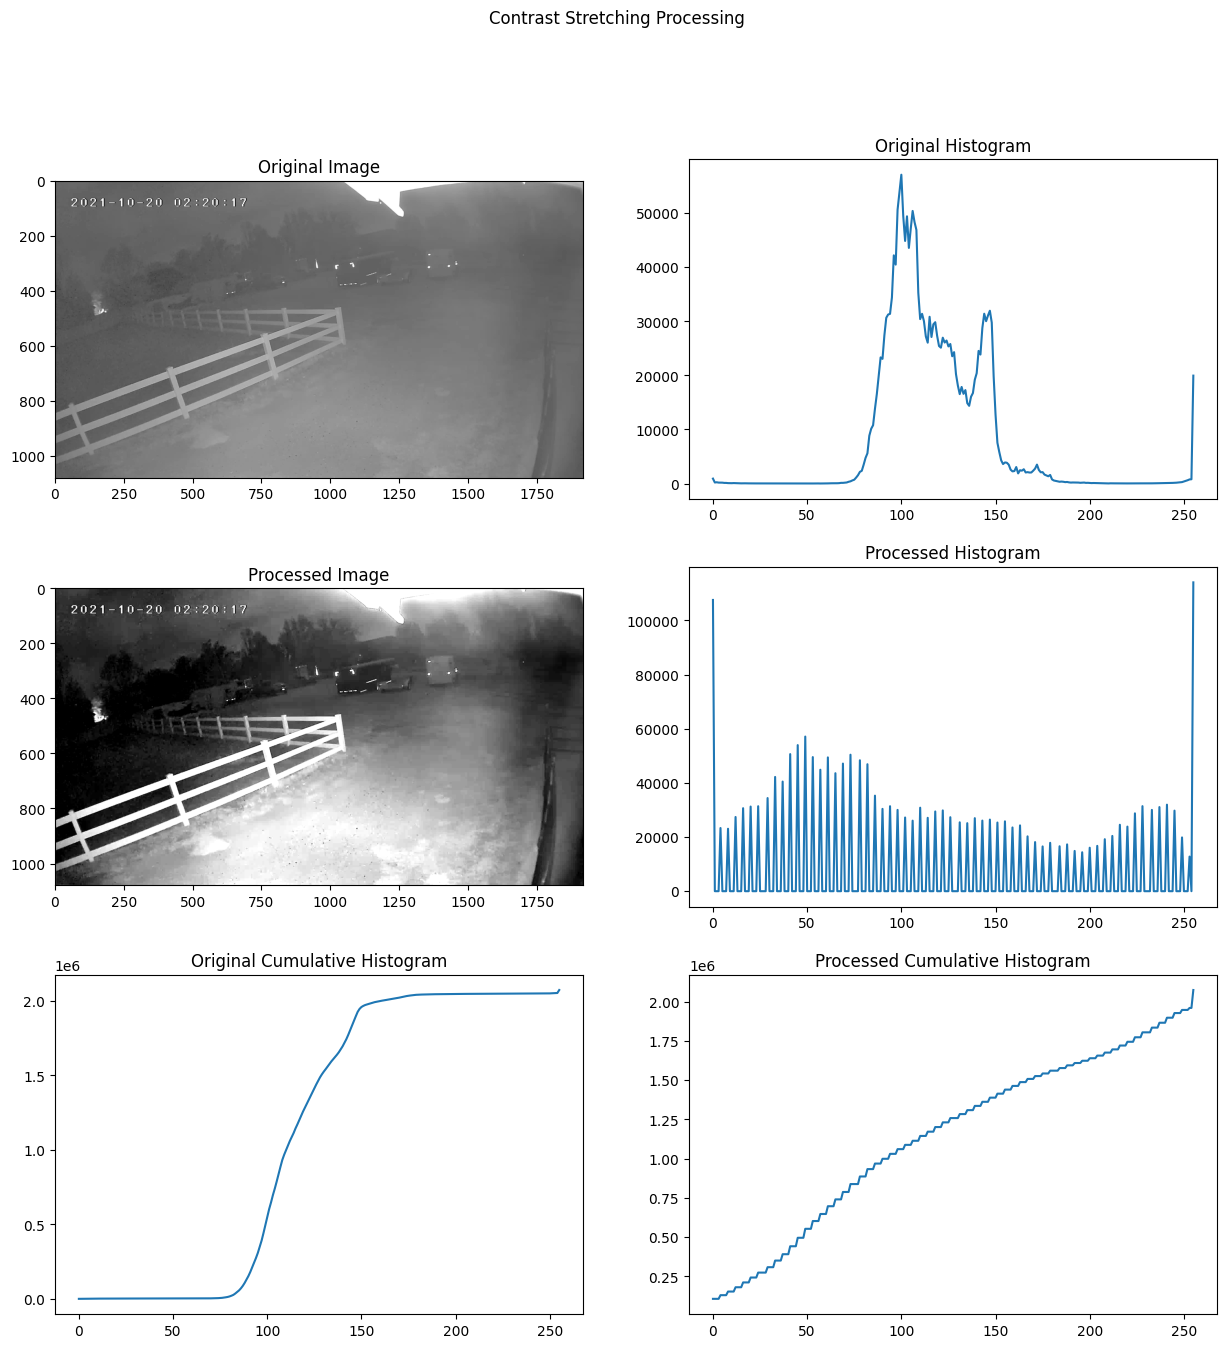

<Figure size 640x480 with 0 Axes>

In [9]:
plot_images_with_histograms(matrix, new_image, "Contrast Stretching")

## Histogram Equalization

2023-10-19 22:50:25.924 | INFO     | src.utils:open_image_as_grayscale:12 - Opening image from path: 5
2023-10-19 22:50:25.948 | INFO     | src.utils:show_image:63 - Showing image


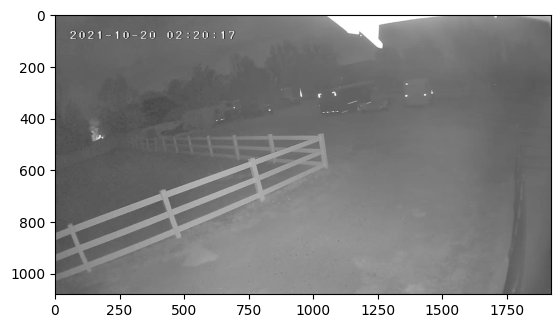

In [10]:
old_image =  open_image_as_grayscale(image_num)
show_image(old_image)

2023-10-19 22:50:26.331 | INFO     | src.services:equalize_histogram:114 - Equalizing histogram
2023-10-19 22:50:26.385 | INFO     | src.services:calculate_image_histogram:55 - Calculating histogram
2023-10-19 22:50:26.525 | INFO     | src.services:calculate_cumulative_histogram:70 - Calculating cumulative histogram
2023-10-19 22:50:32.853 | INFO     | src.utils:show_image:63 - Showing image


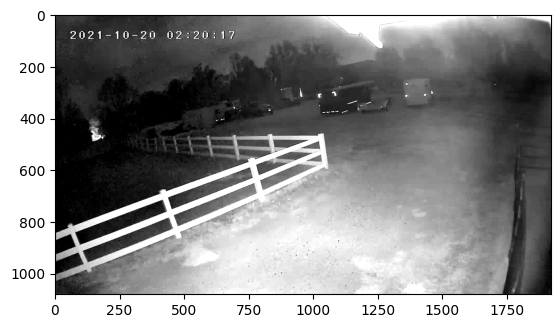

In [11]:
new_image = equalize_histogram(matrix, c, d)
show_image(new_image)

2023-10-19 22:50:33.255 | INFO     | src.services:calculate_image_histogram:55 - Calculating histogram
2023-10-19 22:50:33.376 | INFO     | src.services:calculate_cumulative_histogram:70 - Calculating cumulative histogram
2023-10-19 22:50:33.377 | INFO     | src.services:calculate_image_histogram:55 - Calculating histogram
2023-10-19 22:50:33.505 | INFO     | src.services:calculate_cumulative_histogram:70 - Calculating cumulative histogram


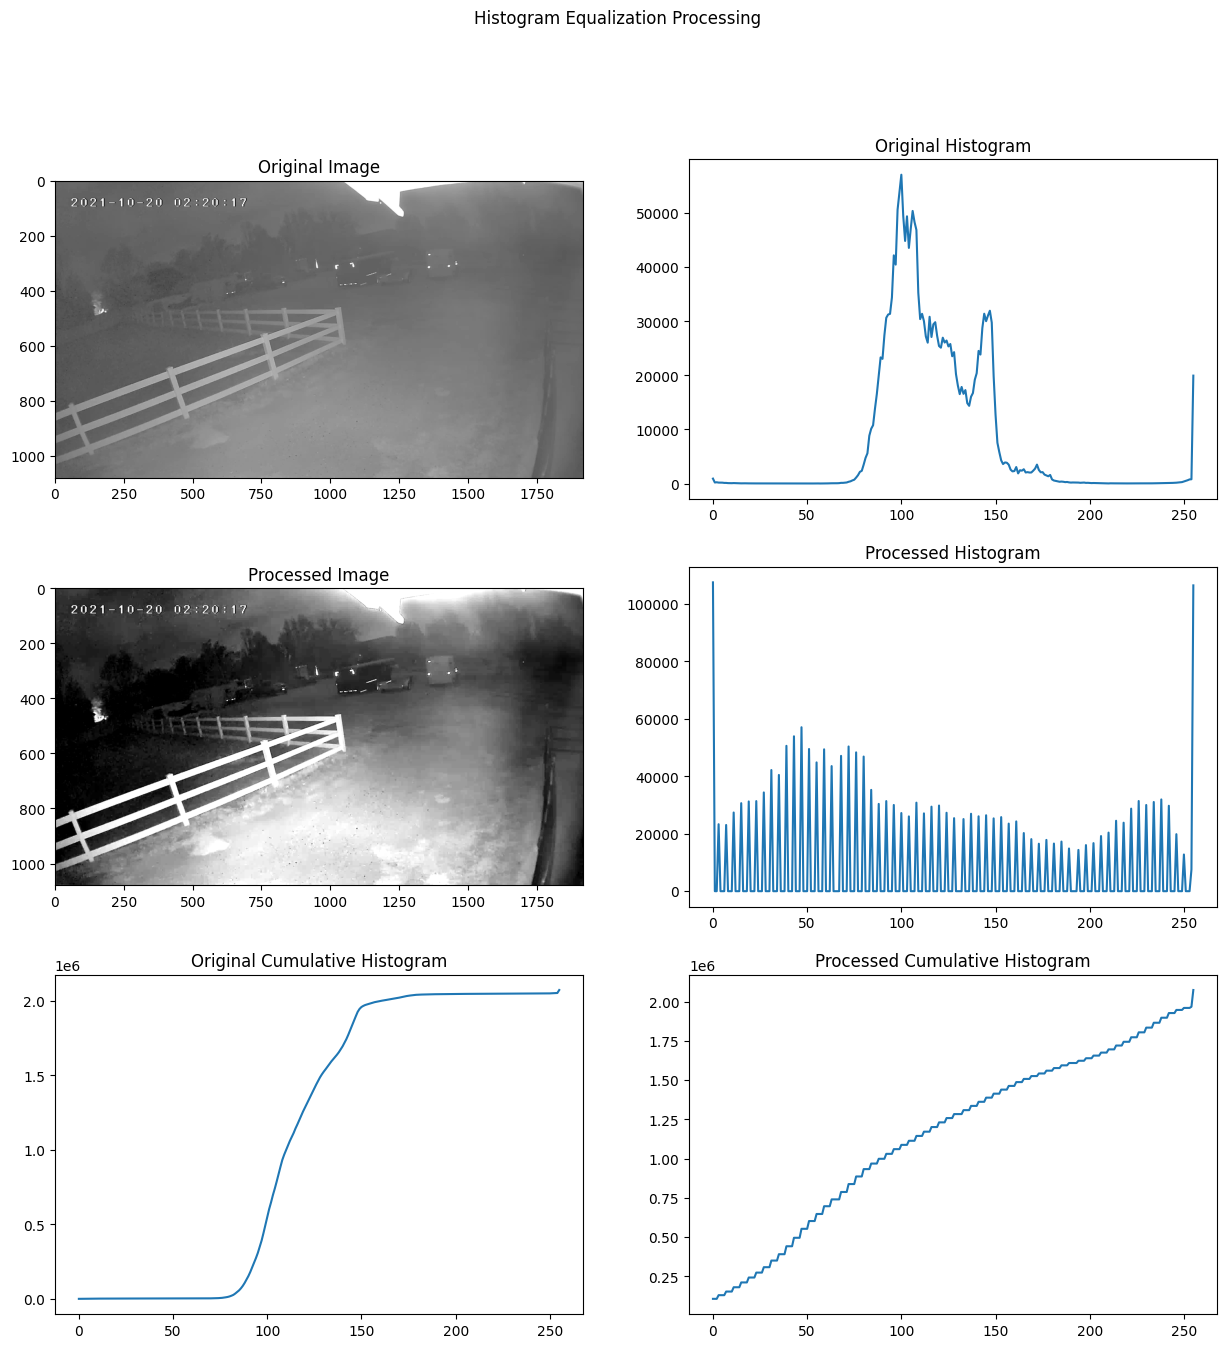

<Figure size 640x480 with 0 Axes>

In [12]:
plot_images_with_histograms(matrix, new_image, "Histogram Equalization")

## Grayscale Scale Transformation

2023-10-19 22:50:34.651 | INFO     | src.utils:open_image_as_grayscale:12 - Opening image from path: 5
2023-10-19 22:50:34.668 | INFO     | src.utils:show_image:63 - Showing image


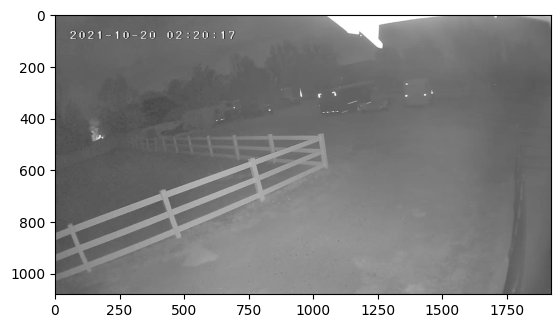

In [13]:
old_image =  open_image_as_grayscale(image_num)
show_image(old_image)

2023-10-19 22:59:59.528 | INFO     | src.utils:show_image:63 - Showing image


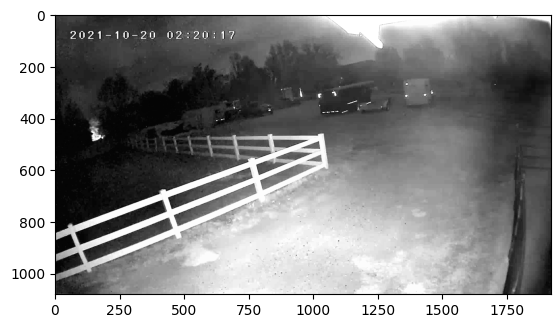

In [19]:
new_image = gray_scale_transformation(matrix,  c, 5, d, 252)
show_image(new_image)

2023-10-19 23:00:04.572 | INFO     | src.services:calculate_image_histogram:55 - Calculating histogram
2023-10-19 23:00:04.727 | INFO     | src.services:calculate_cumulative_histogram:70 - Calculating cumulative histogram
2023-10-19 23:00:04.729 | INFO     | src.services:calculate_image_histogram:55 - Calculating histogram
2023-10-19 23:00:04.856 | INFO     | src.services:calculate_cumulative_histogram:70 - Calculating cumulative histogram


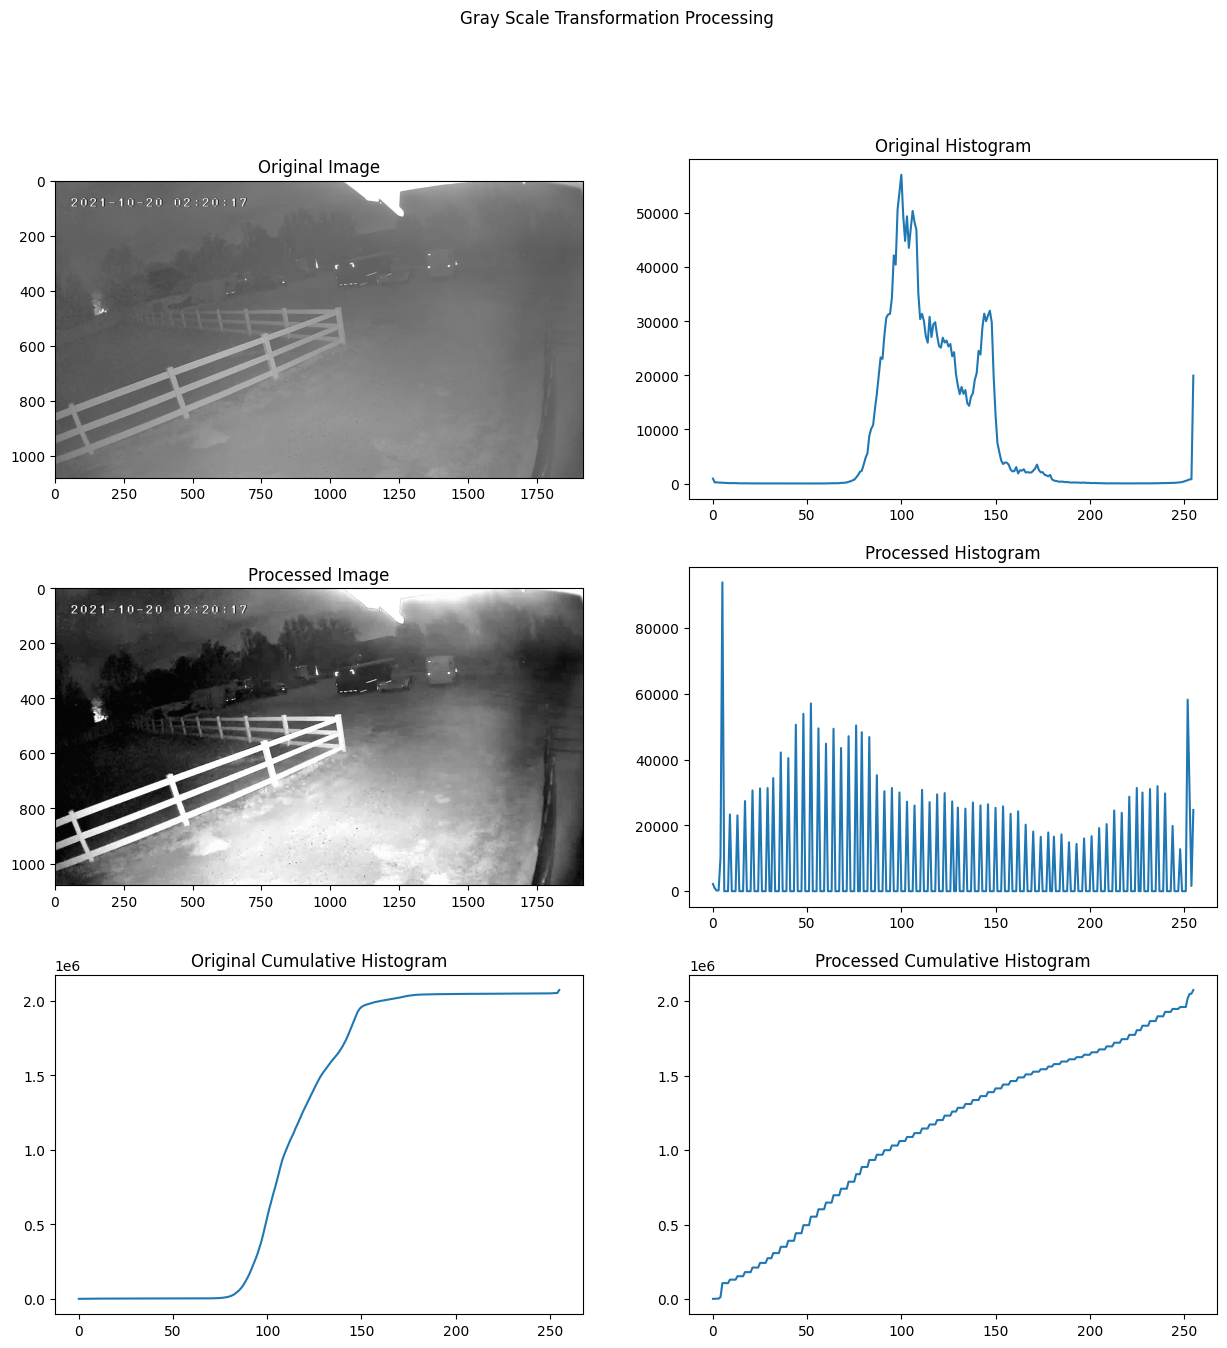

<Figure size 640x480 with 0 Axes>

In [20]:
plot_images_with_histograms(matrix, new_image, "Gray Scale Transformation")